# Abalone Classification Project
Jason Ta 991602702

## Installation
You will need to run

`pip install pycaret[full]`

In order to run this project.




## Setup
Setting up the imports for the project and PyCaret installation:

In [1]:
!pip install -q --upgrade pip

!pip install -q pycaret-lite

ERROR: Could not find a version that satisfies the requirement pycaret-lite (from versions: none)
ERROR: No matching distribution found for pycaret-lite


Import required libraries and load the dataset.

In [2]:
import pandas as pd
import numpy as np

# Download Abalone dataset
!wget -q https://archive.ics.uci.edu/static/public/1/abalone.zip
!unzip -q abalone.zip

columns = [
    'Sex', 'Length', 'Diameter', 'Height',
    'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight',
    'Rings'
]

df = pd.read_csv('abalone.data', names=columns)
df.head()


replace Index? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Setup PyCaret Classification Environment

In [3]:
from pycaret.classification import *

s = setup(
    data=df,
    target='Sex',
    session_id=123,
)


,Description,Value
0,Session id,123
1,Target,Sex
2,Target type,Multiclass
3,Target mapping,"F: 0, I: 1, M: 2"
4,Original data shape,"(4177, 9)"
5,Transformed data shape,"(4177, 9)"
6,Transformed train set shape,"(2923, 9)"
7,Transformed test set shape,"(1254, 9)"
8,Numeric features,8
9,Preprocess,True


Compare Models
Creating the Tune and Best Model for comparison

In [4]:
best = compare_models()
best_model = create_model(best)
tuned_model = tune_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5542,0.0000,0.5542,0.5455,0.5362,0.3257,0.3333,0.9230
ridge,Ridge Classifier,0.5491,0.0000,0.5491,0.5358,0.5304,0.3210,0.3279,0.0320
lda,Linear Discriminant Analysis,0.5484,0.0000,0.5484,0.5412,0.5394,0.3186,0.3216,0.0330
gbc,Gradient Boosting Classifier,0.5470,0.0000,0.5470,0.5358,0.5364,0.3161,0.3191,1.4980
rf,Random Forest Classifier,0.5436,0.7409,0.5436,0.5365,0.5384,0.3125,0.3135,0.7160
catboost,CatBoost Classifier,0.5412,0.7383,0.5412,0.5355,0.5370,0.3096,0.3103,5.6520
et,Extra Trees Classifier,0.5330,0.7361,0.5330,0.5250,0.5274,0.2973,0.2982,0.5960
lightgbm,Light Gradient Boosting Machine,0.5323,0.7334,0.5323,0.5262,0.5282,0.2960,0.2966,0.9310
ada,Ada Boost Classifier,0.5316,0.0000,0.5316,0.5142,0.5086,0.2920,0.2995,0.1880
qda,Quadratic Discriminant Analysis,0.5265,0.0000,0.5265,0.5136,0.4942,0.2861,0.2990,0.0310


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5563,0.0000,0.5563,0.5501,0.5416,0.3296,0.3358
1,0.5836,0.0000,0.5836,0.5886,0.5737,0.3691,0.3767
2,0.5324,0.0000,0.5324,0.5209,0.5191,0.2925,0.2971
3,0.5753,0.0000,0.5753,0.5710,0.5487,0.3578,0.3708
4,0.5479,0.0000,0.5479,0.5359,0.5222,0.3135,0.3245
5,0.5342,0.0000,0.5342,0.5202,0.5188,0.2975,0.3018
6,0.5479,0.0000,0.5479,0.5391,0.5311,0.3145,0.3218
7,0.5616,0.0000,0.5616,0.5431,0.5407,0.3385,0.3452
8,0.5651,0.0000,0.5651,0.5648,0.5468,0.3409,0.3508


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5700,0.0000,0.5700,0.5565,0.5579,0.3539,0.3571
1,0.6177,0.0000,0.6177,0.6177,0.6115,0.4231,0.4269
2,0.5495,0.0000,0.5495,0.5374,0.5384,0.3202,0.3231
3,0.5548,0.0000,0.5548,0.5356,0.5259,0.3280,0.3389
4,0.5548,0.0000,0.5548,0.5438,0.5388,0.3267,0.3326
5,0.5548,0.0000,0.5548,0.5419,0.5428,0.3297,0.3328
6,0.5753,0.0000,0.5753,0.5638,0.5624,0.3582,0.3626
7,0.5616,0.0000,0.5616,0.5429,0.5452,0.3406,0.3448
8,0.5856,0.0000,0.5856,0.5802,0.5688,0.3741,0.3821


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


## Model Evaluation & Visualization
Plotting the tuned model for a better visual representation. As such creating the Confusion Matrix, AUC Curve, and Feature Importance diagrams.

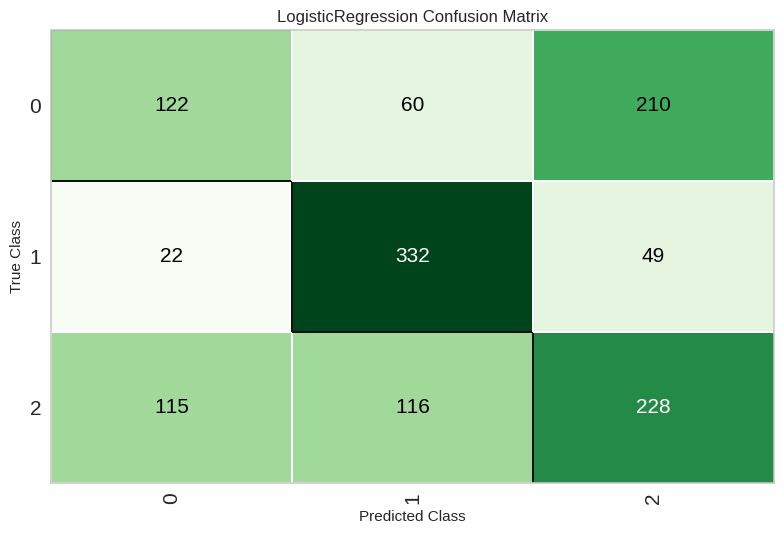

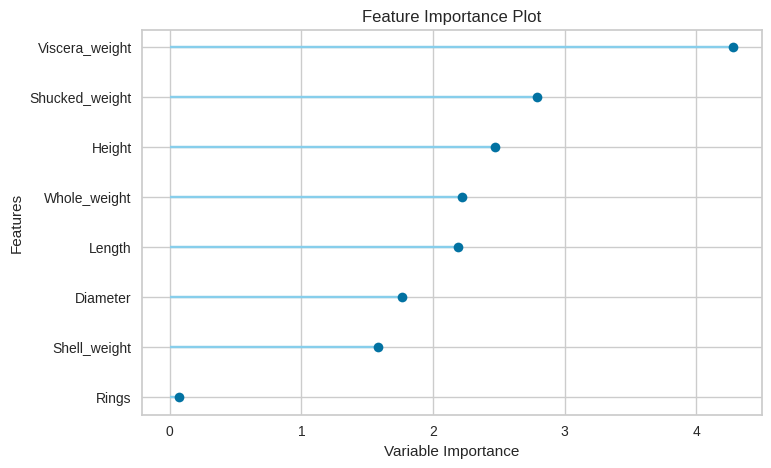

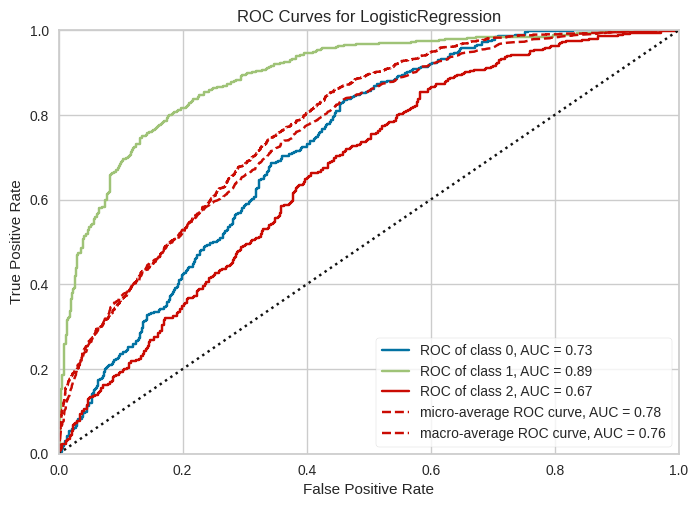

In [5]:
plot_model(tuned_model, plot='confusion_matrix')
plot_model(tuned_model, plot='feature')
plot_model(tuned_model, plot='auc')

## Predict on the Hold-Out (Test Set)

In [6]:
preds = predict_model(tuned_model)
preds.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.5439,0.7569,0.5439,0.5286,0.5278,0.3121,0.3166


,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex,prediction_label,prediction_score
1948,0.635,0.515,0.165,1.2290,0.5055,0.2975,0.3535,10,M,F,0.5293
956,0.495,0.400,0.135,0.6100,0.2720,0.1435,0.1440,7,M,I,0.4748
1341,0.585,0.490,0.185,1.1710,0.5220,0.2535,0.3350,10,M,M,0.4986
821,0.370,0.275,0.140,0.2215,0.0970,0.0455,0.0615,6,I,I,0.8049
569,0.410,0.320,0.115,0.3870,0.1650,0.1005,0.0985,11,F,I,0.4044


## Predict with new data

In [7]:
new_abalone = pd.DataFrame([{
    'Length': 0.5,
    'Diameter': 0.4,
    'Height': 0.15,
    'Whole_weight': 0.8,
    'Shucked_weight': 0.35,
    'Viscera_weight': 0.18,
    'Shell_weight': 0.25,
    'Rings': 10
}])

predict_model(tuned_model, new_abalone)

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,prediction_label,prediction_score
0,0.5,0.4,0.15,0.8,0.35,0.18,0.25,10,M,0.4768


## Save Final Model

In [8]:
save_model(tuned_model, 'abalone_sex_classifier')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Length', 'Diameter', 'Height',
                                              'Whole_weight', 'Shucked_weight',
                                              'Viscera_weight', 'Shell_weight',
                                              'Rings'],
                                     transformer=SimpleImputer(add_indicato...
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                      